In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(['User ID','Gender'],axis=1,inplace=True)

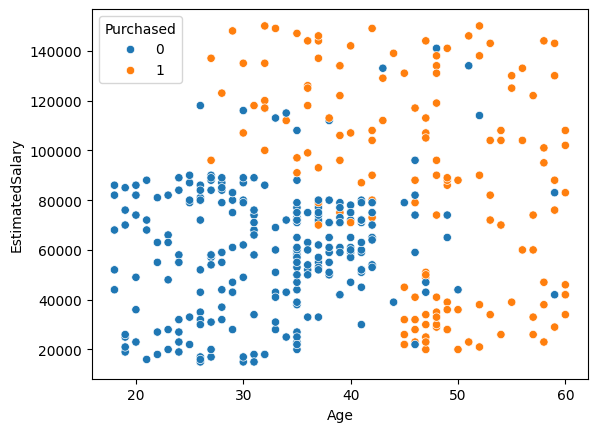

In [33]:
sns.scatterplot(x = 'Age',y='EstimatedSalary',data=df,hue='Purchased')
plt.show()

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
x = df.iloc[:,:-1]
y = df['Purchased']

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

In [11]:
sc.fit(x)

StandardScaler()

In [13]:
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [29]:
dt.score(x_test,y_test)*100

83.75

In [34]:
dt1 = DecisionTreeClassifier(criterion='entropy')

In [35]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
dt1.score(x_test,y_test)*100

83.75

In [36]:
dt.predict([[19,19000]]),dt.predict([[27,57000]])

C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


(array([1], dtype=int64), array([1], dtype=int64))

C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

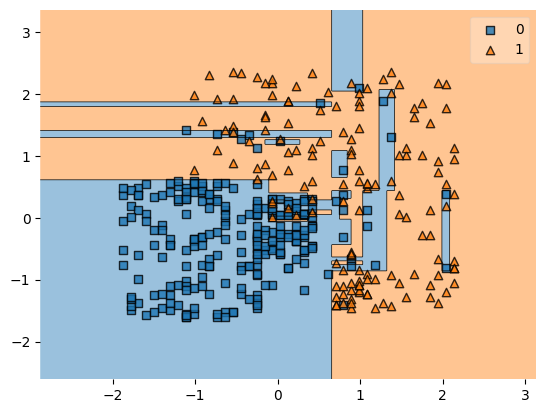

In [39]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf = dt)

C:\Users\ankit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

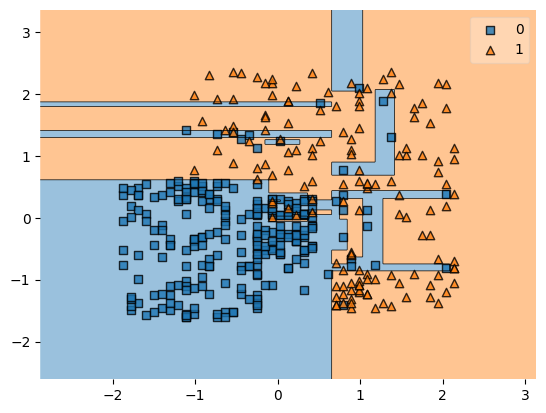

In [40]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf = dt1)

In [25]:
from sklearn.tree import plot_tree

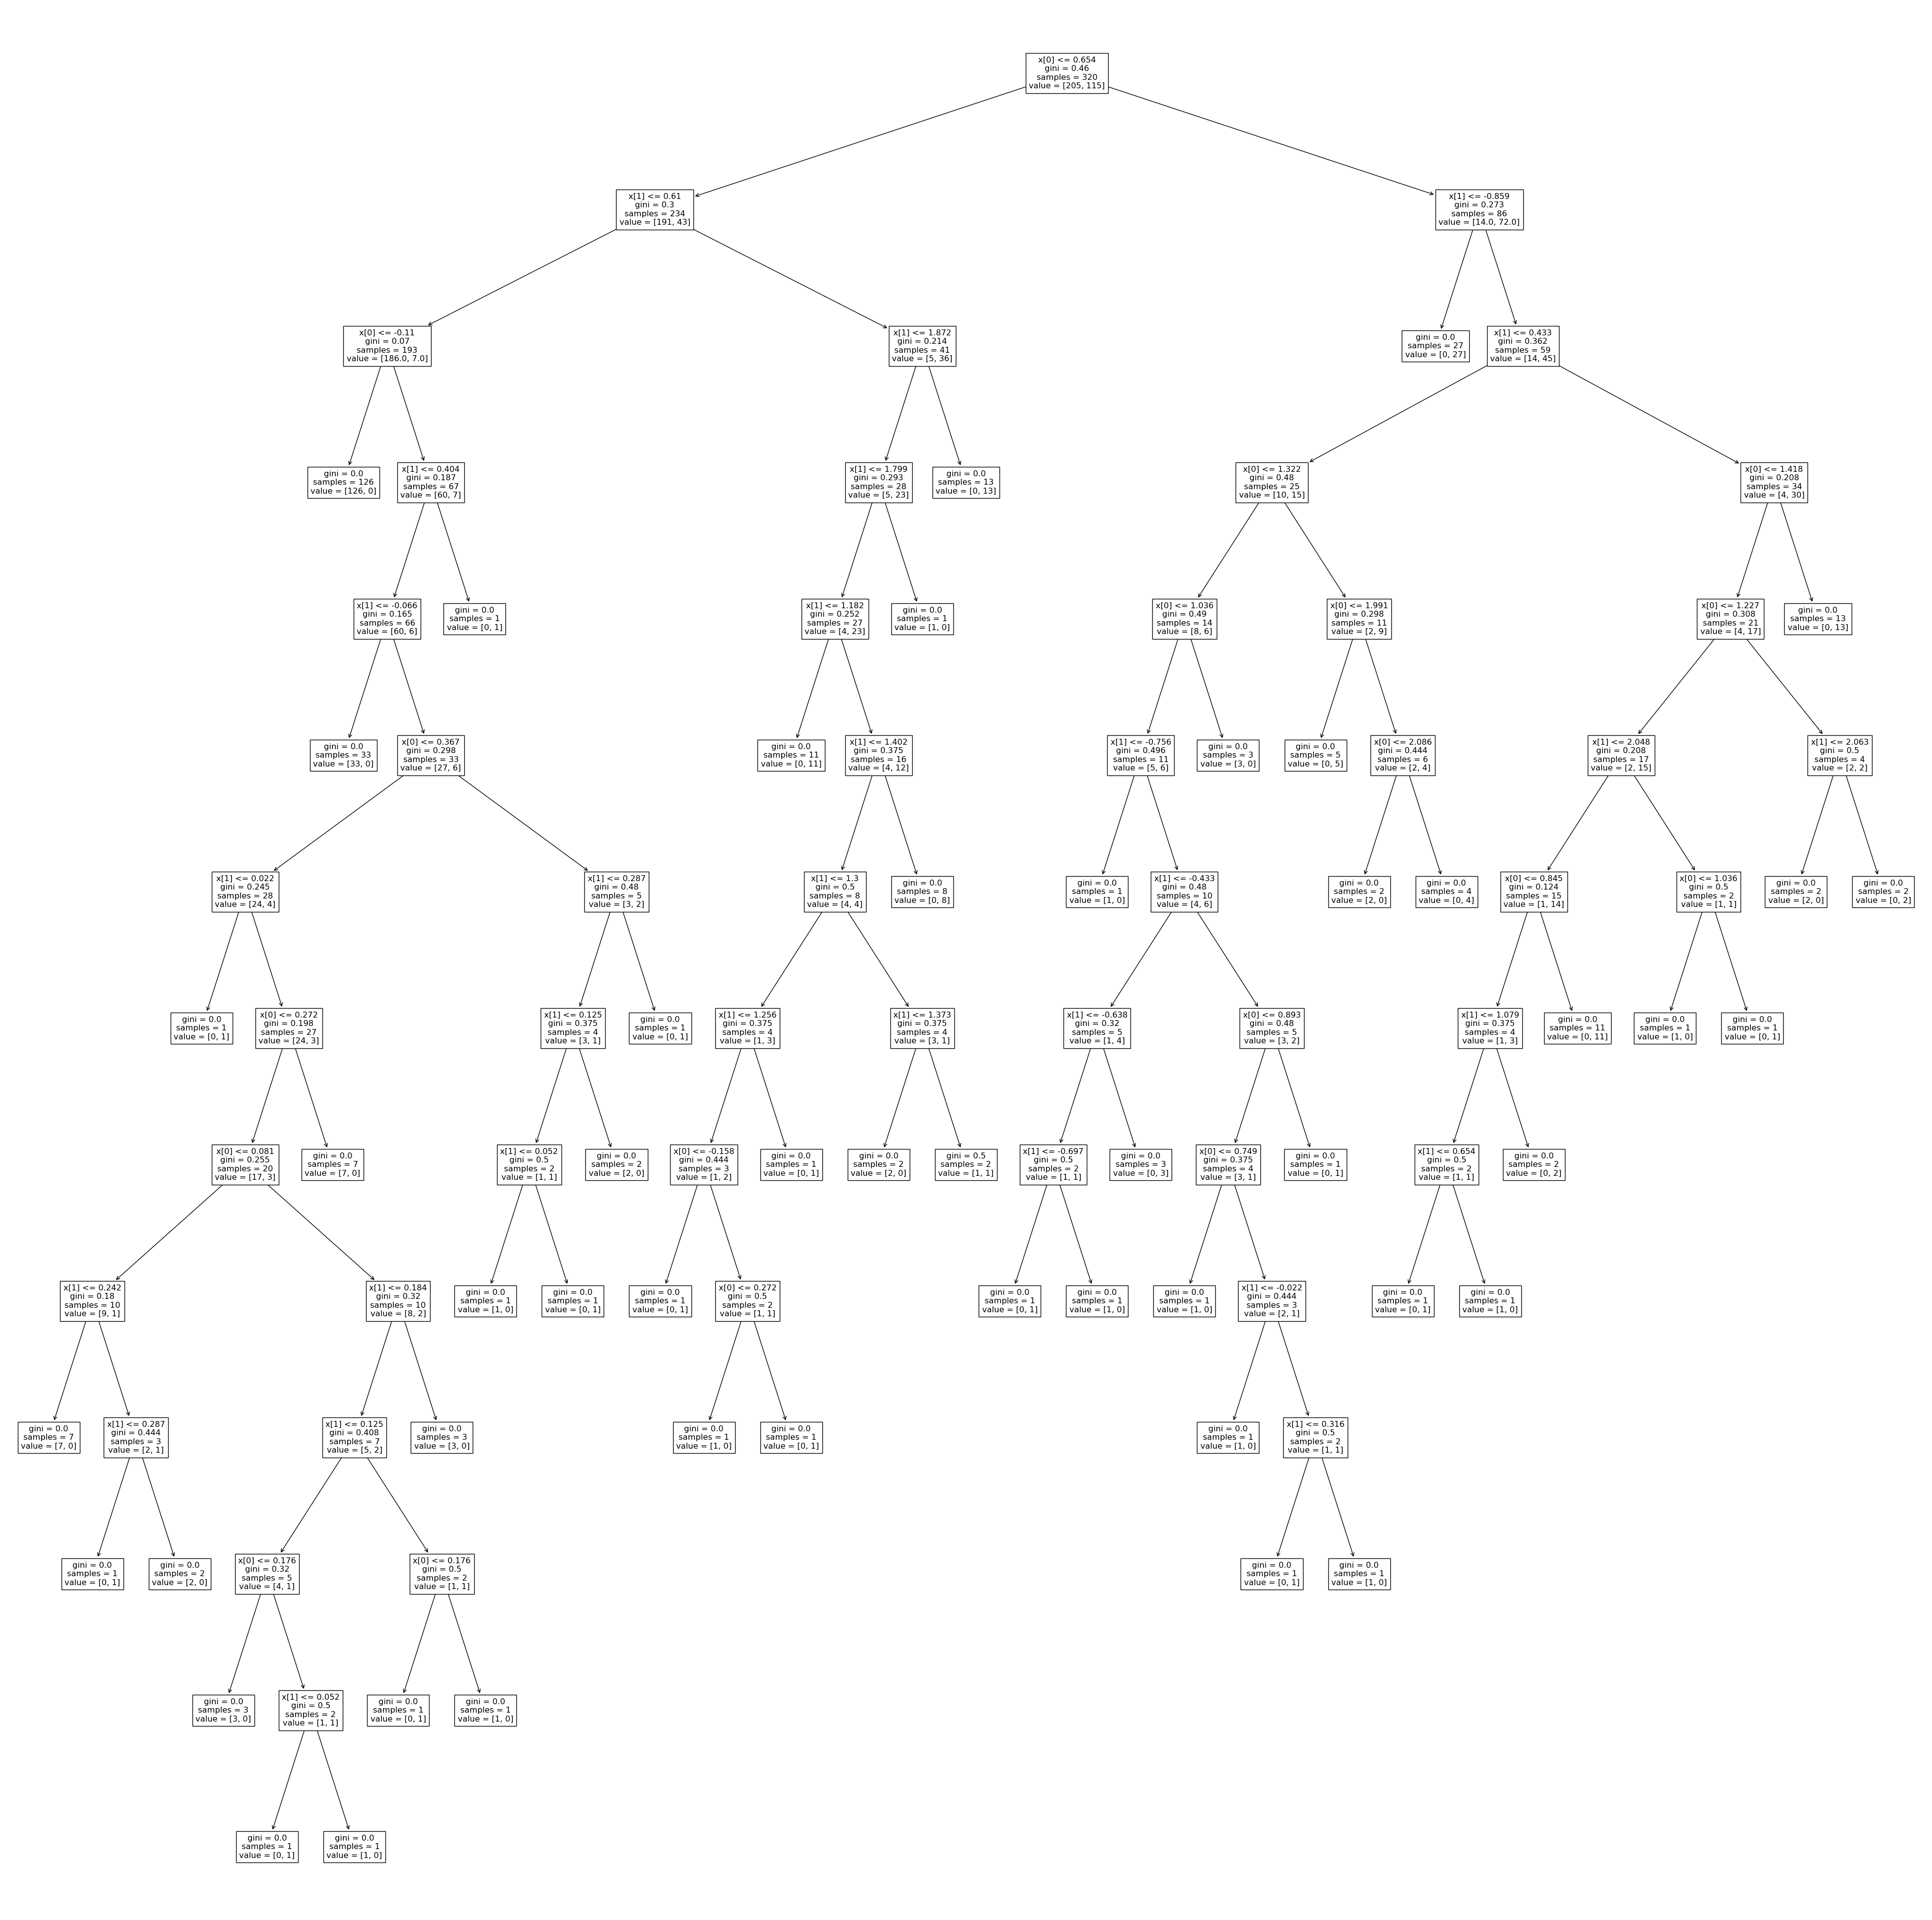

In [32]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig('demo.jpg')
plt.show()